PROJECT 1 PROPOSAL LEVEL 2

IDEA PREDICTING HOUSE PRICES WITH LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')

In [2]:
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None

First few rows:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8

In [3]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [4]:
df = df.drop('Address', axis=1)

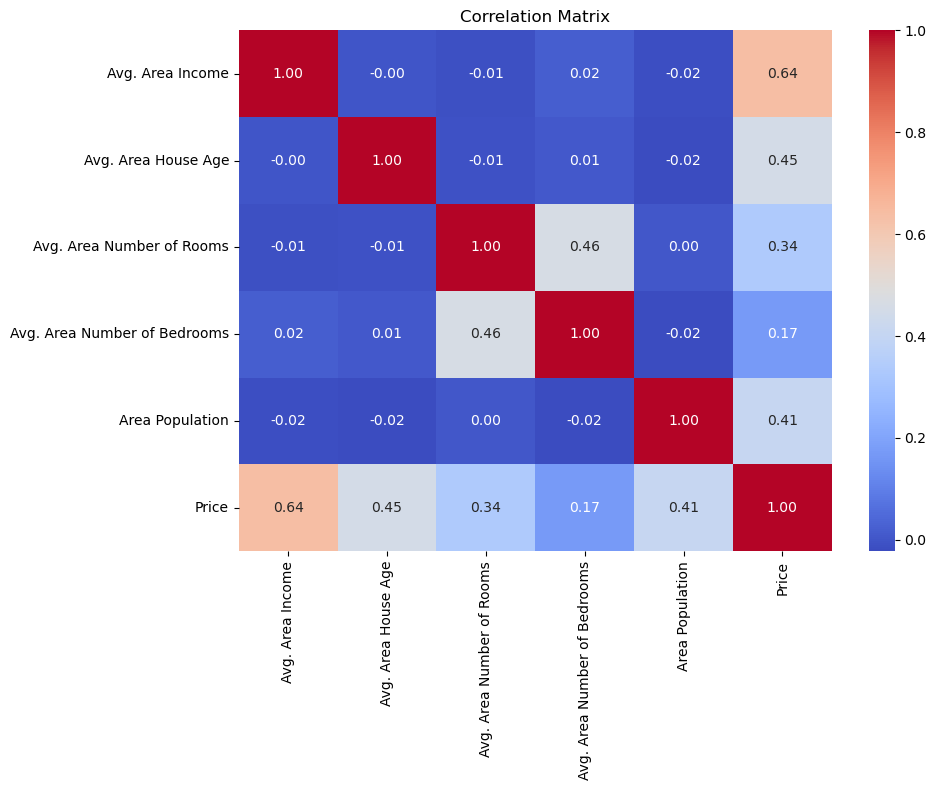

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [6]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: ${mse:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance Metrics:
Mean Squared Error: $10,089,009,300.89
Root Mean Squared Error: $100,444.06
R-squared Score: 0.9180


In [9]:
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: ${coef:,.2f}")
print(f"Intercept: ${model.intercept_:,.2f}")


Model Coefficients:
Avg. Area Income: $21.65
Avg. Area House Age: $164,666.48
Avg. Area Number of Rooms: $119,624.01
Avg. Area Number of Bedrooms: $2,440.38
Area Population: $15.27
Intercept: $-2,635,072.90


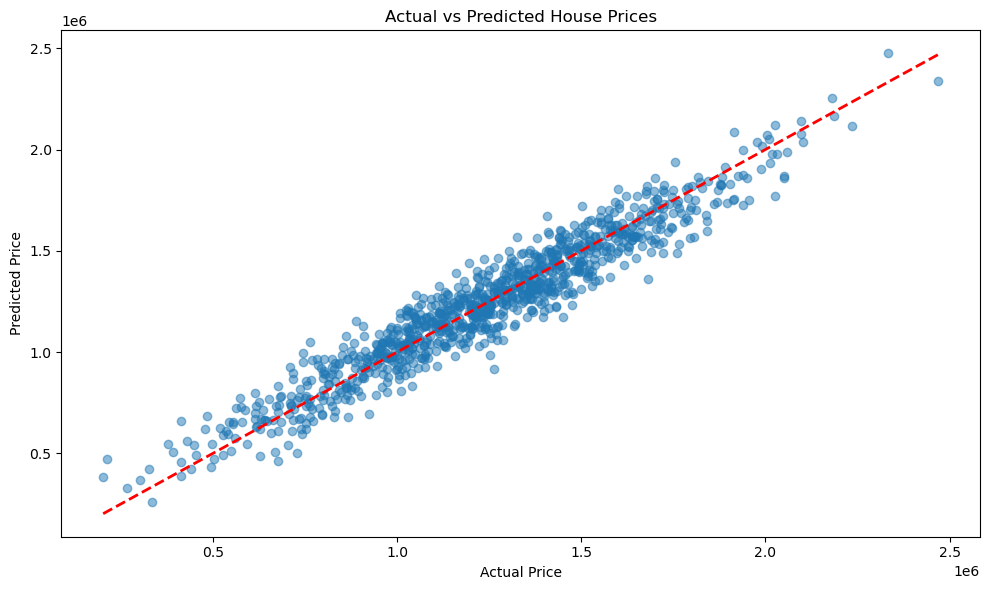

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

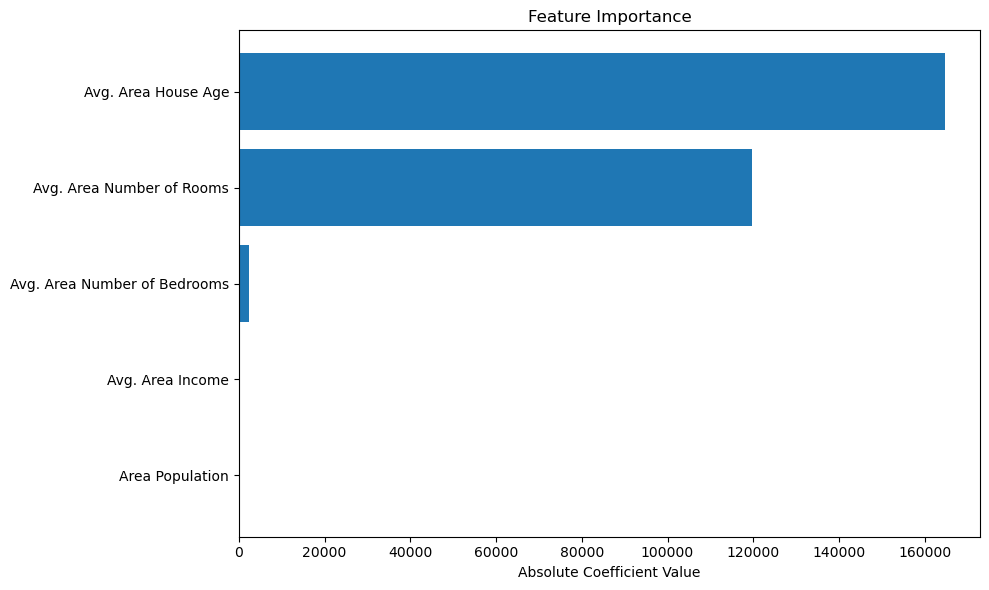

In [11]:
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({'Feature': X.columns,'Absolute Coefficient': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

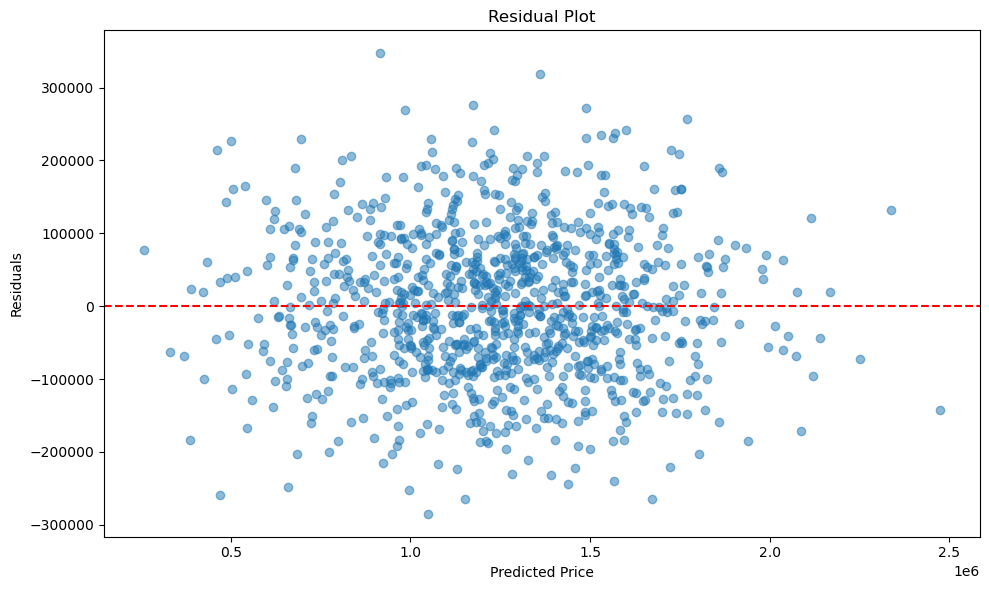

In [12]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()